In [23]:
# Grabbing dependencies
from sqlalchemy import create_engine, inspect
import pandas as pd
from config import credentials 

# Creating engine the locates database in Postgres, concat credentials
engine = create_engine("postgresql://" + credentials +"@localhost:5432/employee_db" )

# Connecting engine
connection = engine.connect()

In [13]:
# Using inspector to get table names in employee_df
inspector = inspect(engine)
inspector.get_table_names()

['titles', 'employees', 'departments', 'dept_manager', 'salaries', 'dep_emp']

In [14]:
# Getting column names and types from a specific table in employee_db
columns = inspector.get_columns('employees')
for column in columns:
    print(column['name'], column['type'])

emp_no INTEGER
emp_title_id VARCHAR(40)
birth_date DATE
first_name VARCHAR(40)
last_name VARCHAR(40)
sex VARCHAR(40)
hire_date DATE


In [24]:
# Create a histogram to visualize the most common salary ranges for employees

# Using pd.read_sql to query into employee_db, only works if connected to engine
salary_data = pd.read_sql("SELECT * FROM salaries", connection)

In [25]:
# Showing first 5 pf salary data
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011E2BEFD208>]],
      dtype=object)

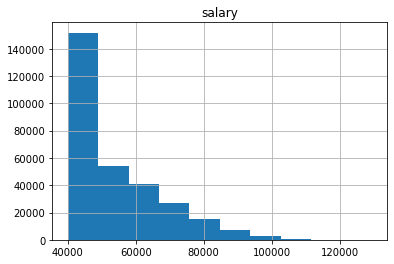

In [27]:
# Using pandas to create a histogram of the salary
salary_hist = salary_data.hist(column = 'salary')

# Showing salary histogram 
salary_hist

In [19]:
# SELECT tit.title, AVG(s.salary) AS avg_salary
# FROM titles AS tit
# INNER JOIN employees AS e
# ON e.emp_title_id = tit.title_id
# INNER JOIN salaries AS s 
# ON s.emp_no = e.emp_no
# GROUP BY tit.title;

In [20]:
# Create a bar chart of average salary by title.

# Reading database into pandas and querying in to get desired data from employee_db
title_salary_avg = pd.read_sql("SELECT tit.title, AVG(s.salary) AS avg_salary FROM titles AS tit INNER JOIN employees AS e ON e.emp_title_id = tit.title_id INNER JOIN salaries AS s ON s.emp_no = e.emp_no GROUP BY tit.title;", connection)

In [21]:
# Showing resulting data from query
title_salary_avg

,title,avg_salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


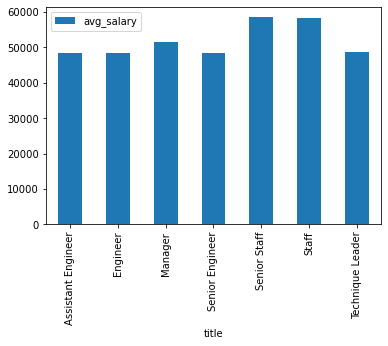

In [11]:
# Using pandas to plot a bar graph of the average salary by title
bar = title_salary_avg.plot.bar(x = 'title', y = 'avg_salary')
bar